In [ ]:
#@title Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, clear_output
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib
import plotly.express as px
font = {'size'   : 14}
plt.rc('font', **font)
#!pip install plotly==5.4.0

In [ ]:
#@title Read Data
df=pd.read_csv('tickets.csv')
df.user_team=df.user_team.str.capitalize()

#Part 1

In [ ]:
#@title Add Customer Satsified to dataframe which depends on satisfaction score being higher than 3 and if problem was resolved
customer_satisfied=[]
for i in range(len(df)):
  rating = df.customer_satisfaction[i]
  resolve= df.customer_problem_resolved[i]
  sats= True if (rating>=4 and resolve) else False
  customer_satisfied.append(sats)
df['customer_satisfied']=customer_satisfied
df['customer_satisfied']=df['customer_satisfied']*100

trueCount=df[(df['customer_problem_resolved']==True)  & (df['customer_satisfaction']>=4)].groupby('user_team').count()
allCount=df.groupby('user_team').count()
trueCount= trueCount['ticket_type']
perc=(trueCount/allCount['ticket_type'])*100
allCount['perc']= perc
allCount=allCount.reset_index()

In [ ]:
#@title Plot: Percantage of Satisfied Customers
#store colors for each team in dictionary
colors={'Blue':'#1e90ff','Green': '#0BB200','Orange':'#FF5703','Red':'crimson'}
colorslist=list(colors.values())

team=list(df.user_team.unique())
team= ["All Teams"]+team
@interact(Team=team)
def f(Team=team):
  dfMini= df[df['user_team']==Team]
  
  fig, ax = plt.subplots(figsize=(16,8))
  font = {'size'   : 16}
  plt.rc('font', **font)
  if (Team  == 'All Teams'):
    
    sns.barplot(data=allCount,x='user_team',y='perc',palette=colorslist\
                ,joinstyle='bevel')
    plt.xlabel("Team")
    plt.title("Percantage of Satisfied Customers per Team")

                
  if (Team != 'All Teams'):
    sns.barplot(data= dfMini,x='user_actioned',y='customer_satisfied',color=colors[str(Team)],ci=0)
    plt.xlabel('Team members')
    plt.title("Percantage of Satisfied Customers per Member for team " +str(Team))


  plt.ylabel("Percentage of Satisfied Customers")
  plt.ylim(0,45)
  plt.show()
  

interactive(children=(Dropdown(description='Team', options=('All Teams', 'Orange', 'Blue', 'Green', 'Red'), va…

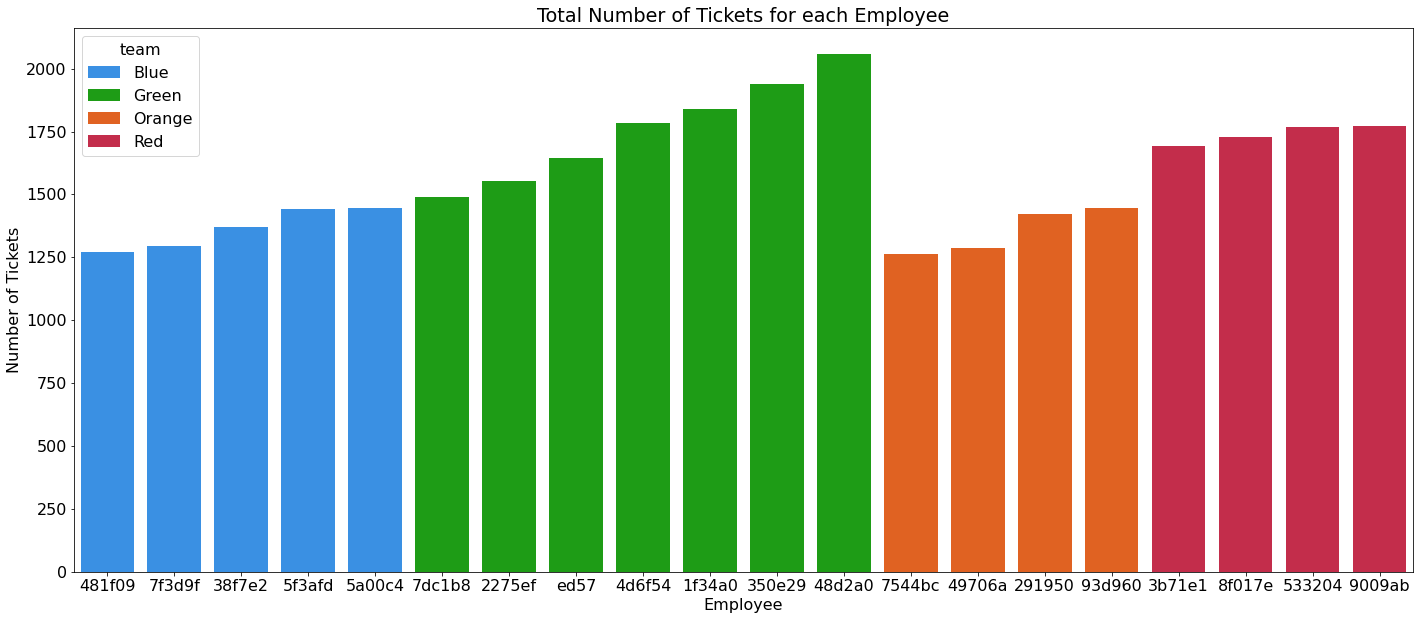

In [ ]:
#@title Plot: Total Number of Tickets per employee
user=df.groupby('user_actioned').count().reset_index()
user['count']= user.ticket_type
user=user[['user_actioned','count']]
team=[]
for i in range(len(user)):
  u=user.iloc[i][0]
  team.append(df[df['user_actioned']==user.iloc[i][0]].iloc[0].user_team)
user['team']= team
user=user.sort_values(by=['team','count'])


plt.figure(figsize=(24,10))
sns.barplot(data=user,x='user_actioned',y='count',hue='team',dodge=False,palette=colors)
plt.title("Total Number of Tickets for each Employee")
plt.xlabel('Employee')
plt.ylabel("Number of Tickets")
plt.show()


#Part 2


In [ ]:
#@title Add total duration and time it took to resolve for each ticket to dataframe. 
view=pd.to_datetime(df['view_date'])
action=pd.to_datetime(df['action_date'])
timeToResolve= action-view
df['time_to_resolve']= timeToResolve
creation=pd.to_datetime(df['creation_date'])
df['duration']= action-creation
duration=[]
timeToResolve=[]
for i in range(len(df)):
  duration.append(df.duration.iloc[i].total_seconds()/60)
  timeToResolve.append(df.time_to_resolve.iloc[i].total_seconds()/60)
df['duration']= duration
df['time_to_resolve']= timeToResolve


duration=[]
max_dur=5000
for i in range(len(df)):
  dur= df.duration.iloc[i]
  if dur>= max_dur:
    duration.append(max_dur)
  else:
    duration.append(dur)
df['duration']= duration

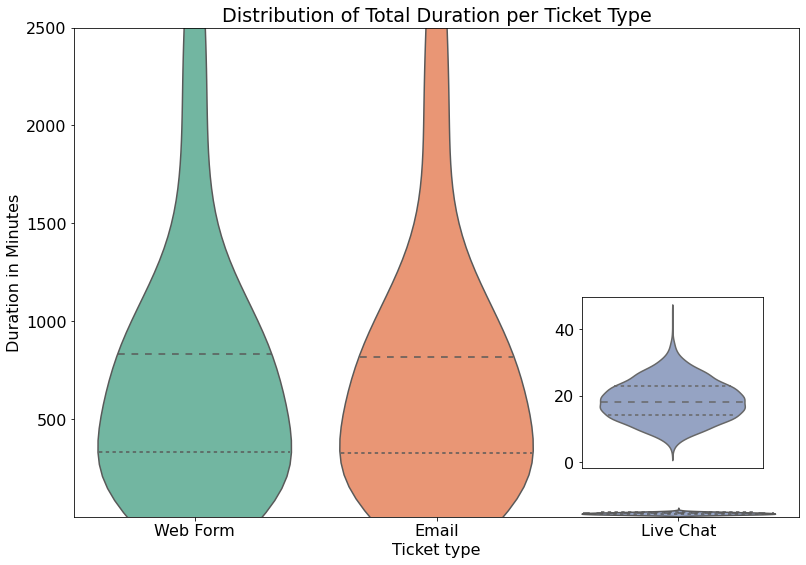

In [ ]:
#@title Plot: Total Duration of tickets per ticket type
fig3=plt.figure(figsize=(13,9))
spec = gridspec.GridSpec(ncols=20, nrows=20,wspace=0.00,hspace=0.00)
axbig = fig3.add_subplot(spec[0:20, 0:20])
sns.violinplot(data=df,x='ticket_type',y='duration',inner='quartile',scale='width',\
               order=['web_form','email','live_chat'],palette="Set2")
plt.ylim(1,2500)
axbig.set_ylabel('Duration in Minutes')
axbig.set_xlabel('Ticket type')
labels = [item.get_text() for item in axbig.get_xticklabels()]
labels[0]='Web Form'
labels[1]='Email'
labels[2]= 'Live Chat'
axbig.set_xticklabels(labels)
plt.title('Distribution of Total Duration per Ticket Type')


axlittle = fig3.add_subplot(spec[11:18, 14:19])
sns.violinplot(data=df[df['ticket_type']=='live_chat'],x='ticket_type',y='duration'\
               ,inner='quartile',scale='width',color=sns.color_palette("Set2")[2])
plt.xlabel(" ")
plt.ylabel(" ")
plt.tick_params(bottom=False,labelbottom=False)
plt.show()

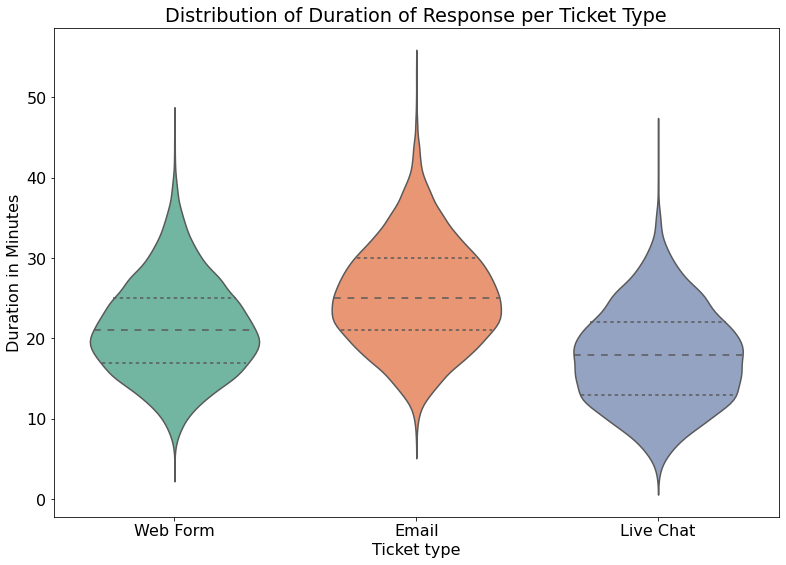

In [ ]:
#@title Plot:Duration of Response per Ticket Type
fig3=plt.figure(figsize=(13,9))
ax=sns.violinplot(data=df,x='ticket_type',y='time_to_resolve',inner='quartile',width=0.7,\
               scale='width',order=['web_form','email','live_chat'],palette="Set2")

ax.set_title('Distribution of Duration of Response per Ticket Type')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Ticket type')
labels[0]='Web Form'
labels[1]='Email'
labels[2]= 'Live Chat'
ax.set_xticklabels(labels)
plt.show()

#Part 3 

In [ ]:
#@title Plot: Treemap breaking down share of tickets per team then per ticket type.
c={'Blue':'#1e90ff','Green': '0BB200','Orange':'#FF5703','Red':'crimson'}

fig=px.treemap(data_frame=df, path=['user_team','ticket_type'],color='user_team',color_discrete_map= c)

fig.update_layout(
    title={
        'text': "Breakdown of Number of Tickets Processed per Team",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

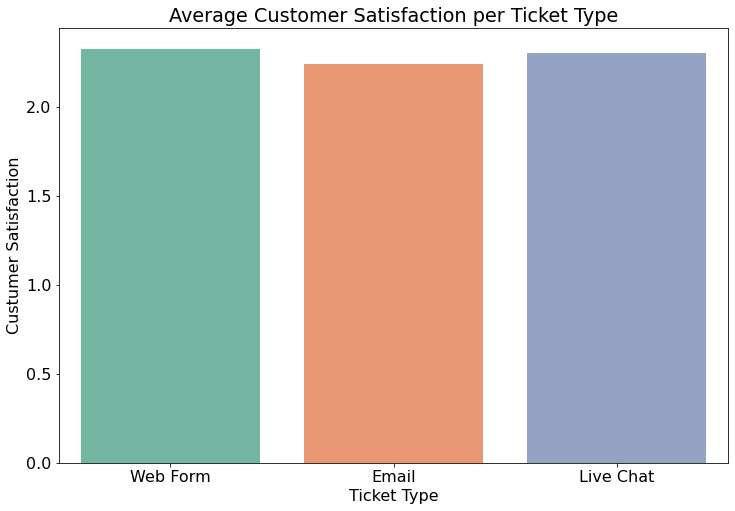

In [ ]:
#@title Plot: Average Customer Satisfaction per Ticket Type
plt.figure(figsize=(12,8))
ax=sns.barplot(data=df, x='ticket_type',y='customer_satisfaction',palette="Set2",order=['web_form','email','live_chat'],ci=0)
plt.xlabel('Ticket Type')
plt.ylabel('Custumer Satisfaction')
plt.title("Average Customer Satisfaction per Ticket Type")
labels[0]='Web Form'
labels[1]='Email'
labels[2]= 'Live Chat'
ax.set_xticklabels(labels)
plt.show()

# Bonus part

In [ ]:
#@title Add hours of ticket resolution to Dataframe

resolution=pd.to_datetime(df.action_date)

hour=[]
for i in range(len(resolution)):
  h=resolution[i].hour
  if h%2 ==0:
    hour.append(h)
  if h%2 !=0:
    hour.append(h)
df['hour_resolved']=hour

colors={'Blue':'#1e90ff','Green': '#0BB200','Orange':'#FF5703','Red':'crimson'}

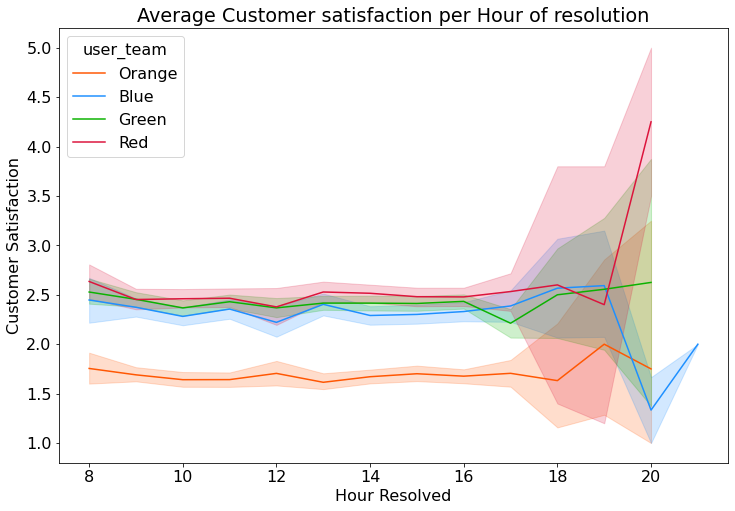

In [ ]:
#@title Plot:Average Customer satisfaction per Hour of resolution
plt.figure(figsize=(12,8))
sns.lineplot(data= df, y='customer_satisfaction',x='hour_resolved',hue='user_team',palette=colors,legend='brief')
plt.title('Average Customer satisfaction per Hour of resolution')
plt.xlabel('Hour Resolved')
plt.ylabel("Customer Satisfaction")

plt.show()